<a href="https://colab.research.google.com/github/mnslarcher/cs224w-slides-to-code/blob/main/notebooks/04-link-analysis-pagerank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Link Analysis: PageRank

In [1]:
import random
from typing import Optional

import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

In [2]:
def seed_everything(seed: Optional[int] = None) -> None:
    random.seed(seed)
    np.random.seed(seed)


seed_everything(42)

# Example: Flow Equations & M

In [3]:
def get_stochastic_adjacency_matrix(G: nx.Graph) -> np.ndarray:
    nodes = list(G.nodes())
    num_nodes = len(nodes)
    M = np.zeros((num_nodes, num_nodes))
    for j, node_j in enumerate(nodes):
        in_edges = G.in_edges(node_j)
        for in_edge in G.in_edges(node_j):
            node_i = in_edge[0]
            i = nodes.index(node_i)
            M[j, i] += 1.0 / G.out_degree(node_i)

    return M

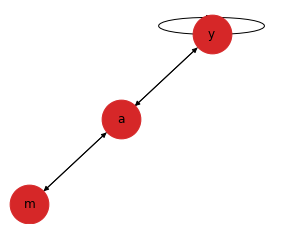


Stochastic Adjacency Matrix M (nodes ['y', 'a', 'm']):
[[0.5 0.5 0. ]
 [0.5 0.  1. ]
 [0.  0.5 0. ]]


In [4]:
edge_list = [("y", "a"), ("y", "y"), ("a", "m"), ("a", "y"), ("m", "a")]
G = nx.DiGraph(edge_list)
M = get_stochastic_adjacency_matrix(G)

plt.figure(figsize=(4, 3))
# Self/multiple edges visualization sucks
nx.draw(G, node_color="tab:red", node_size=1500, with_labels=True)
plt.show()

print(f"\nStochastic Adjacency Matrix M (nodes {G.nodes()}):")
print(M)

# Summary: Page Rank Variants

In [5]:
def pagerank_example(
    personalization: Optional[dict] = None,
    spring_layout_k: float = 5.0,
    label_rank_threshold: float = 0.02,
    cmap_name: str = "viridis",
    node_size_factor: float = 2e4,
    width: float = 1.5,
    font_size: int = 16,
    seed: Optional[int] = 42,
) -> None:
    edge_list = [
        ("B", "C"),
        ("C", "B"),
        ("D", "A"),
        ("D", "B"),
        ("E", "B"),
        ("E", "D"),
        ("E", "F"),
        ("F", "B"),
        ("F", "E"),
        ("G", "B"),
        ("G", "E"),
        ("H", "B"),
        ("H", "E"),
        ("I", "B"),
        ("I", "E"),
        ("J", "E"),
        ("K", "E"),
    ]
    G = nx.DiGraph(edge_list)
    ranks = nx.pagerank(G, personalization=personalization)
    max_rank = max(ranks.values())
    node_sizes = [node_size_factor * rank / max_rank for node, rank in ranks.items()]
    cmap = plt.get_cmap(cmap_name)
    node_colors = [cmap(rank / max_rank) for node, rank in ranks.items()]
    node_lables = {
        node: f"{node}\n{100 * ranks[node]:.1f}" if ranks[node] > label_rank_threshold else "" for node in G.nodes
    }
    pos = nx.spring_layout(G, k=spring_layout_k, seed=seed)
    nx.draw(
        G,
        pos=pos,
        node_color=node_colors,
        labels=node_lables,
        edgecolors="black",
        node_size=node_sizes,
        width=1.5,
        font_size=font_size,
    )

## PageRank

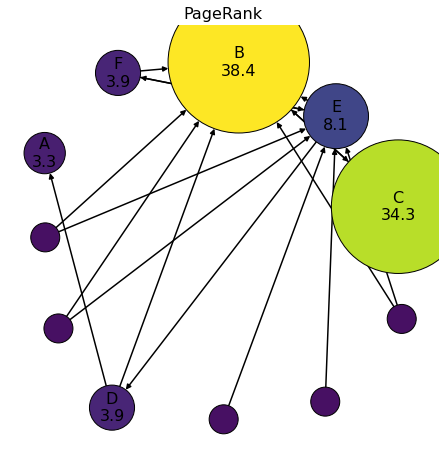

In [6]:
personalization = None  # Equivalent to {"A": 1 / num_nodes, "B": 1 / num_nodes, ...}

plt.figure(figsize=(6, 6))
pagerank_example(personalization=personalization)
plt.title("PageRank", fontsize=16)
plt.show()

## Personalized PageRank

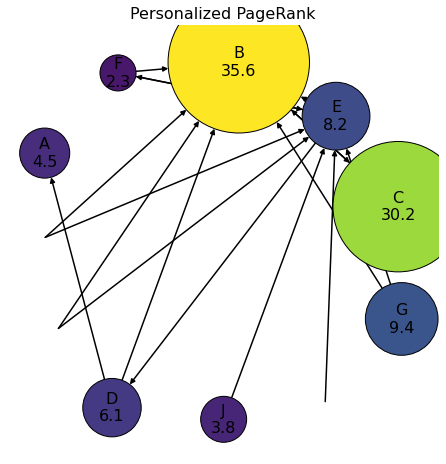

In [7]:
personalization = {"A": 0.1, "D": 0.2, "G": 0.5, "J": 0.2}

plt.figure(figsize=(6, 6))
pagerank_example(personalization=personalization)
plt.title("Personalized PageRank", fontsize=16)
plt.show()

## Random Walk with Restarts

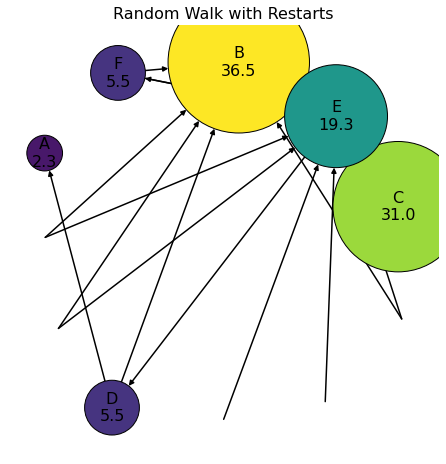

In [8]:
personalization = {"E": 1.0}

plt.figure(figsize=(6, 6))
pagerank_example(personalization=personalization)
plt.title("Random Walk with Restarts", fontsize=16)
plt.show()